## 지도학습 + 분류예측을 통한 붓꽃 IRIS 분류
### 지도학습?? 
- 정답(Label)을 지도.
- 정답이 존재하는 상태에서 머신러닝에게 문제의 특성과 정답을 같이 학습시키는 방법론
- 분류 예측 : 미리 정해져 있는 클래스를 예측하는 작업(ex : MBTI, 혈액형)
- 회귀 예측 : 무한대에 가까운 숫자(실수)를 예측하는 작업(ex : 부동산 가격, 주식 가격)

### 학습목표
- 과소적합, 과대적합, 일반화 용어 학습
- KNN 모델의 알고리즘을 학습
  

In [1]:
train_rate = 0.7 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
from sklearn.datasets import load_iris

In [3]:
# 필요한 데이터 불러오기
# as_frame의 경우, 데이터를 데이터프레임 형태로 반환받겠다는 것
get_data = load_iris(as_frame = True)

# 데이터 프레임을 확인한 결과, 딕셔너리 타입의 데이터임,
X = get_data['data']

# data 키 값 안에는, 붓꽆의 특성 데이터가 들어있다.
X

# 0, 1, 2로 구성되어 있는 Series 타입
get_data['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [4]:
# target 데이터 탐색

# 0 : setosa, 1 : versicolor, 2 : virginica
names = get_data['target_names']

get_data['target'].value_counts()

y = get_data['target']

### 데이터 셋 구성

- X : 특성 데이터, y : 정답 데이터로 분리한 상태
- 머신러닝 모델은 학습을 시켜준 뒤에 잘 학습을 했는지 평가하는 절차가 필요함.
  -> 평가를 진행할 데이터가 필요하다.
- 기존 데이터에서 약간 쪼개서. 7 : 3 비율로 나눌 것. 7은 학습 데이터, 3은 평가 데이터

In [5]:
# 데이터를 균등하게 분리하기
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    # random_state에 42를 넣으므로, 다시 시작을 하더라도 같은 값을 넣도록 함
    X, y, train_size = train_rate, stratify = y, random_state = 42
)  

In [6]:
y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()
print(f'y의 학습 데이터 길이 : {len(y_train)}', end='\n\n')
print(f'y의 평가 데이터 길이 : {len(y_test)}', end='\n\n')

print(f'y의 학습 데이터 분포: {y_train_counts}', end='\n\n')
print(f'y의 평가 데이터 분포: {y_test_counts}')

y의 학습 데이터 길이 : 105

y의 평가 데이터 길이 : 45

y의 학습 데이터 분포: target
1    35
0    35
2    35
Name: count, dtype: int64

y의 평가 데이터 분포: target
2    15
1    15
0    15
Name: count, dtype: int64


In [7]:
print(f'X의 학습 데이터 길이 : {len(X_train)}', end='\n\n')
print(f'X의 평가 데이터 길이 : {len(X_test)}')

X의 학습 데이터 길이 : 105

X의 평가 데이터 길이 : 45


In [8]:
# 데이터의 형태 파악

print("X_train의 형태 : ", X_train.shape)
print("X_test의 형태 : ", X_test.shape)

print("y_train의 형태 : ", y_train.shape)
print("y_test의 형태 : ", y_test.shape)

X_train의 형태 :  (105, 4)
X_test의 형태 :  (45, 4)
y_train의 형태 :  (105,)
y_test의 형태 :  (45,)


### 모델링

- 1. 모델 선택
- 2. HyperParameter를 조절
     - HyperParameter : 모델의 성능을 조율할 수 있는 매개변수
- 3. 모델 학습

In [9]:
# 필요한 모델 불러오기
# 1. 모델 선택
from sklearn.neighbors import KNeighborsClassifier 

# 2. 하이퍼파라미터 조정
# 각 머신러닝 모델마다 특화되어 있는 알고리즘이 있음 
model = KNeighborsClassifier(n_neighbors = 7) 

In [10]:
# 모델 학습 
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
# 모델 예측 및 평가
pre = model.predict(X_test)
# 예측한 결과를 pre에 저장
pre

names[pre]

# 모델이 정답을 얼마나 맞췄는지 파악
result = np.mean(pre == y_test).round(4) * 100
print(f'결과 : {result}%의 정확도를 가짐')

결과 : 95.56%의 정확도를 가짐


In [12]:
model_2 = KNeighborsClassifier() 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, train_size = train_rate, stratify = y, random_state = 42
)  

In [46]:
max_index = len(X_train)
pre_result_dict = {}
from tqdm import tqdm

train_list = [] # train 셋의 평가 결과를 담아줄 리스트
test_list = [] # test 셋의 평가 결과를 담아줄 리스트

for i in tqdm(range(max_index)):  
    index = i + 1
    model_2 = KNeighborsClassifier(n_neighbors = index)
    model_2.fit(X_train, y_train)
    pre_2 = model_2.predict(X_test)
    names[pre_2]
        
    result = np.mean(pre_2 == y_test).round(4) * 100 

    pre_result_dict[index] = result  # 딕셔너리에 결과 추가

    train_score = round(model_2.score(X_train, y_train), 6) 
    test_score = round(model_2.score(X_test, y_test), 6) 
    
    train_list.append(train_score)
    test_list.append(test_score)
 

100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:01<00:00, 54.84it/s]


In [17]:

# 위의 방법이 아닌. scores 함수로 테스트 해보기

model_3 = KNeighborsClassifier(n_neighbors = 5)
model_3.fit(X_train, y_train)
pre_3 = model_3.predict(X_test)
names[pre_3] 
model_3.score(X_test, y_test)


0.9777777777777777

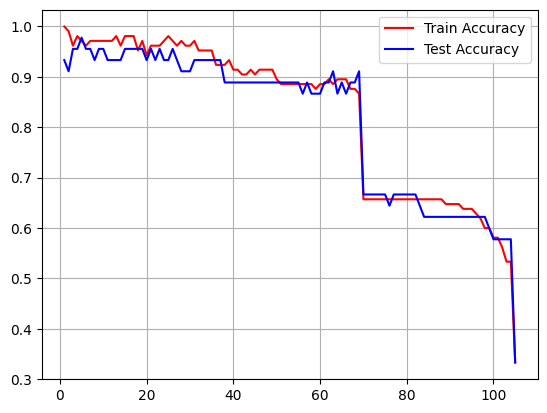

In [64]:
sorted_pre_result_dict = {k: v for k, v in sorted(pre_result_dict.items(), key=lambda item: item[1], reverse=True)}
sorted_pre_result_dict

plt.plot(range(1, len(train_list) + 1), train_list, label = 'Train Accuracy', color = 'red')
plt.plot(range(1, len(test_list) + 1 ), test_list, label = 'Test Accuracy', color = 'blue')

plt.legend()
plt.grid()

plt.show()

0.96